# Predict Airbnb Profit (Part 1: Cleaning)
***

## Purpose:
The dataset is part of an [online repository](http://insideairbnb.com/index.html) to gather details on Airbnb listings and the effect of the service has on many locations around the world. There are a variety of datasets, this project will focus on the [listing details](http://data.insideairbnb.com/united-states/ca/los-angeles/2017-05-02/data/listings.csv.gz) from Los Angeles, California compiled in May 2017.

The overall purpose of this project is to predict revenue and identify the features with the the most impact to revenue. There is a significant amount of data cleaning to prepare the data for modeling and I will break the project into four different parts. 

***

### *Primary Question*

*Can we predict potential revenue based on the listing attributes?*


## Findings:
* Multiple text fields to look into later
* Some lisitngs are outside the Los Angeles area
* There is a segment within Los Angeles that allows limited guests and make little revenue

# Initial Investigation

In [1]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the dataset
listing = pd.read_csv('data/listings.csv.gz')

# Look at the dimensions
listing.shape

C:\Users\peril\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(31253, 95)

In [2]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16228948,https://www.airbnb.com/rooms/16228948,20170502172350,2017-05-03,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,NaN,NaN,NaN,NaN,- No noise/music outside allowed after 10 pm. ...,NaN,NaN,https://a0.muscache.com/im/pictures/dd850460-4...,NaN,54345288,https://www.airbnb.com/users/show/54345288,Robert,2016-01-12,"Los Angeles, California, United States",Thank You for considering my house for your ne...,a few days or more,25%,NaN,f,https://a0.muscache.com/im/pictures/1977b9db-1...,https://a0.muscache.com/im/pictures/1977b9db-1...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Acton, CA 93510, United States",NaN,Acton,NaN,Acton,CA,93510,Other (Domestic),"Acton, CA",US,United States,34.530350,-118.227088,t,House,Entire home/apt,10,7.0,5.0,5.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Pool,K...",NaN,"$3,000.00",NaN,NaN,"$2,000.00",$200.00,1,$0.00,1,1125,5 months ago,NaN,27,53,82,352,2017-05-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,strict,f,f,1,NaN
1,8909380,https://www.airbnb.com/rooms/8909380,20170502172350,2017-05-03,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,NaN,The train station is only one mile away,Whole house,As much or as little as they want,NaN,https://a0.muscache.com/im/pictures/38165109-1...,https://a0.muscache.com/im/pictures/38165109-1...,https://a0.muscache.com/im/pictures/38165109-1...,https://a0.muscache.com/im/pictures/38165109-1...,44800067,https://www.airbnb.com/users/show/44800067,Kevin,2015-09-22,"Acton, California, United States",NaN,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/287ea76c-1...,https://a0.muscache.com/im/pictures/287ea76c-1...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Palmdale, CA 93550, United States",NaN,Acton,NaN,Palmdale,CA,93550,Other (Domestic),"Palmdale, CA",US,United States,34.485431,-118.125380,f,House,Private room,2,1.0,1.0,1.0,Real Bed,{},NaN,$50.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,2 months ago,NaN,29,45,75,350,2017-05-03,33,2015-12-04,2017-04-22,93.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,flexible,f,f,1,1.91
2,14078522,https://www.airbnb.com/rooms/14078522,20170502172350,2017-05-03,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking

### Data Type Conversions

In [3]:
# Convert strings to integers for boolean values
bool_feat = ['host_identity_verified','host_has_profile_pic','host_is_superhost','instant_bookable','requires_license',
'is_location_exact','require_guest_phone_verification','require_guest_profile_picture']

for b in (bool_feat):
    listing[b] = listing[b].map({'t': 1.0, 'f': 0.0})
    
# Convert $ to float
convert = ('price','cleaning_fee','extra_people')

for con in (convert):
    listing[con] = (listing[con].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
listing['host_response_rate'] = (listing['host_response_rate'].replace( '[\%,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [4]:
listing.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.125300e+04,3.125300e+04,3.125300e+04,25692.000000,0.0,31239.000000,31239.000000,31239.000000,31239.000000,31239.000000,0.0,31253.000000,31253.000000,31253.000000,31253.000000,31156.000000,31218.000000,31194.000000,384.000000,31253.000000,24279.000000,31253.000000,31253.000000,31253.000000,3.125300e+04,0.0,31253.000000,31253.000000,31253.000000,31253.000000,31253.000000,23726.000000,23689.000000,23688.000000,23661.000000,23690.000000,23660.000000,23648.000000,31253.000000,31253.000000,31253.000000,31253.000000,31253.000000,24030.000000
mean,1.085829e+07,2.017050e+13,3.632524e+07,93.869570,NaN,0.203176,5.171132,5.171132,0.996639,0.692468,NaN,34.056220,-118.334252,0.793588,3.425751,1.381211,1.350119,1.888985,1002.359375,180.094039,75.675028,1.717339,13.387643,3.208460,2.068968e+05,NaN,14.141170,31.312994,49.981890,199.351358,20.842543,94.214533,9.612394,9.416456,9.770297,9.768974,9.612933,9.485411,0.031677,0.272998,0.025534,0.033885,3.546572,1.857360
std,5.527237e+06,3.531306e+00,3.454658e+07,17.587166,NaN,0.402368,24.143834,24.143834,0.057879,0.461479,NaN,0.101912,0.153783,0.404736,2.481926,0.828010,0.991736,1.524551,1026.104882,418.502140,73.743635,1.501258,23.495221,8.169057,2.103927e+07,NaN,11.733025,22.764830,33.718022,138.546709,38.106641,8.040304,0.789394,0.954680,0.652473,0.658068,0.735289,0.834739,0.175141,0.445507,0.157742,0.180935,5.551354,2.022831
min,1.090000e+02,2.017050e+13,5.900000e+01,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,33.338905,-118.911026,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000
25%,6.262191e+06,2.017050e+13,7.441819e+06,100.000000,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,NaN,34.013997,-118.431313,1.000000,2.000000,1.000000,1.000000,1.000000,300.000000,69.000000,30.000000,1.000000,0.000000,1.000000,3.000000e+01,NaN,1.000000,8.000000,17.000000,68.000000,1.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.410000
50%,1.216199e+07,2.017050e+13,2.471631e+07,100.000000,NaN,0.000000,2.000000,2.000000,1.000000,1.000000,NaN,34.066607,-118.349465,1.000000,2.000000,1.000000,1.000000,1.000000,765.000000,100.000000,55.000000,1.000000,0.000000,2.000000,1.125000e+03,NaN,13.000000,32.000000,56.000000,208.000000,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.120000
75%,1.570678e+07,2.017050e+13,5.623875e+07,100.000000,NaN,0.000000,4.000000,4.000000,1.000000,1.000000,NaN,34.103960,-118.267693,1.000000,4.000000,1.500000,2.000000,2.000000,1335.000000,170.000000,100.000000,2.000000,20.000000,3.000000,1.125000e+03,NaN,27.000000,55.000000,84.000000,341.000000,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.730000
max,1.852404e+07,2.017050e+13,1.285513e+08,100.000000,NaN,1.000000,855.000000,855.000000,1.000000,1.000000,NaN,34.742088,-117.655471,1.000000,16.000000,8.000000,10.0

### Remove Certain Features

In [5]:
# It has almost 100 columns, I'll drop the obvious features like url's
listing = listing.drop(['listing_url','scrape_id','last_scraped','thumbnail_url',
                       'medium_url','picture_url','xl_picture_url','host_url',
                       'host_name','host_location','host_about',
                       'host_thumbnail_url','host_picture_url',
                       'host_neighbourhood','host_verifications','weekly_price',
                       'monthly_price','calendar_last_scraped','first_review',
                       'last_review','host_acceptance_rate','neighbourhood_group_cleansed',
                      'square_feet','has_availability','license','availability_90',
                       'availability_60','availability_30','zipcode','market','host_since','city','state',
                       'neighbourhood_cleansed','id','host_id','smart_location','country_code','country',
                        'review_scores_checkin'], axis=1)

# For the sake of this project I will remove unstructured text features and investigate them in another project to 
# show the value of text classification to modeling
listing = listing.drop(['name','summary','description','space','notes','transit','access','interaction','house_rules',
                       'street','neighborhood_overview','jurisdiction_names','neighbourhood'], axis=1)

###  Dealing with Missing/Null Values

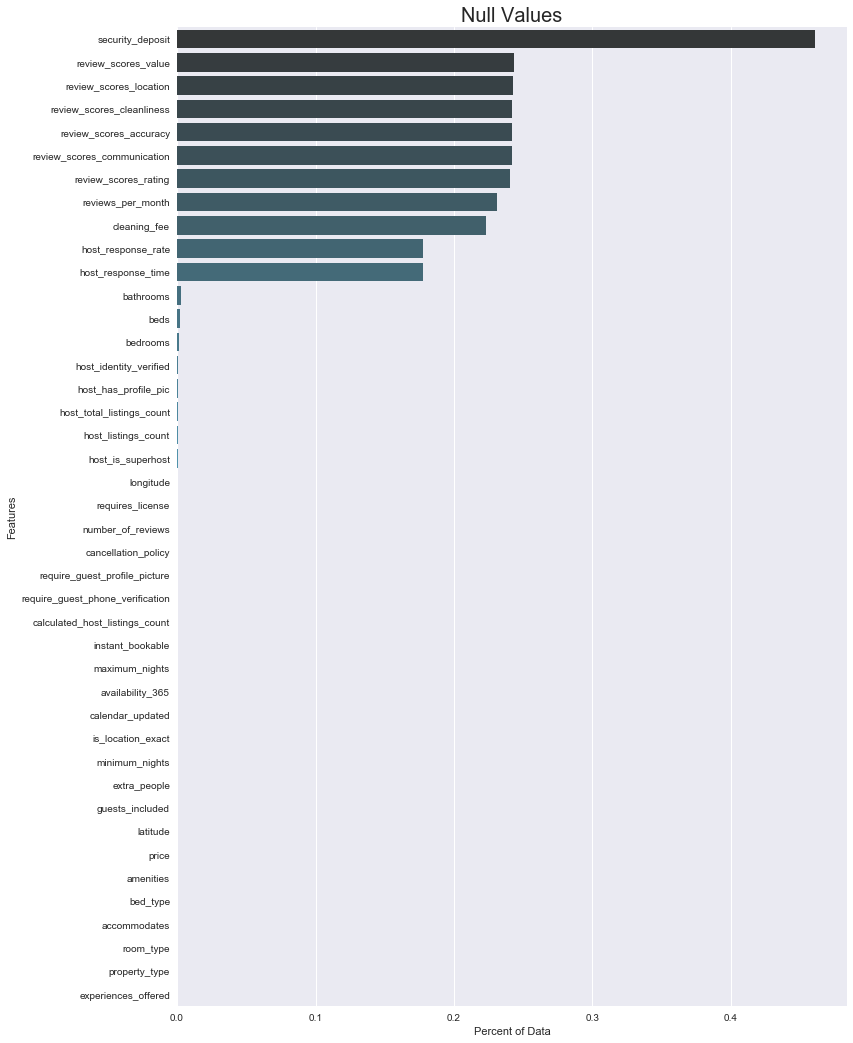

In [6]:
# Count null values
null = listing.isnull().sum(axis=0)
null = pd.DataFrame(null).reset_index()
null['percent'] = null[0]/31253 

# Plot null values, sorted
null = null.sort_values(by='percent',ascending=False)
fig, ax = plt.subplots(figsize=(12,18))
ax.set_yticklabels(null.index.values, rotation='horizontal')
sns.barplot(x=null['percent'],y=null['index'], palette='GnBu_d').set_title('Null Values',fontsize=20)
ax.set(xlabel='Percent of Data', ylabel='Features')

In [7]:
# Create security_deposit_required boolean feature then drop security_deposit column
list_sec = listing['security_deposit']
sd = []
for row in list_sec:
    if pd.isnull(row):
        sd.append(0.0)
    else:
        sd.append(1.0)
listing['security_deposit_required'] = sd
listing = listing.drop('security_deposit',axis=1)

In [8]:
# Impute missing values
for m in (bool_feat):
    listing[m].fillna(listing[m].median(),inplace=True)
    
# Impute missing instances with the median
missing = ('host_response_rate','bathrooms','review_scores_rating','reviews_per_month','cleaning_fee',
           'beds','bedrooms','host_listings_count','host_is_superhost','host_total_listings_count','review_scores_value',
           'review_scores_location','review_scores_cleanliness','review_scores_accuracy','review_scores_communication','price')

for miss in (missing):
    listing[miss].fillna(listing[miss].median(),inplace=True)

### Derive Target Variable

In [9]:
# Airbnb says average stay is 3 days, and 50% of the time a review is made
avg_stay = 3
review_rate = 0.5
listing['revenue'] = avg_stay * listing['price'] * (listing['reviews_per_month'] / review_rate) * 12

### Categorical Feature Analysis

In [10]:
# Remove categories with little variance
from sklearn.feature_selection import VarianceThreshold
def VarianceThreshold_selector(data):
    columns = data.columns
    selector = VarianceThreshold(.1)
    selector.fit_transform(data)
    labels = [columns[x] for x in selector.get_support(indices=True)]
    return pd.DataFrame(selector.fit_transform(data), columns=labels)

# Run the function
keep = VarianceThreshold_selector(listing[bool_feat])
listing = listing.drop(bool_feat, axis=1)
listing.reset_index(inplace=True)
listing = listing.join(keep)

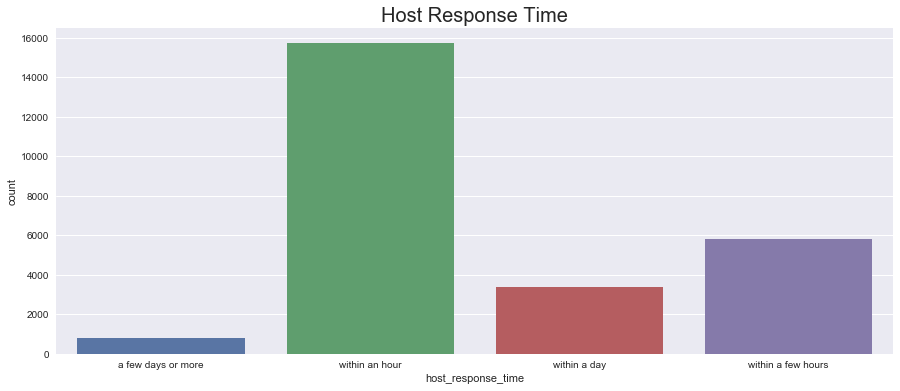

In [11]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['host_response_time']).set_title('Host Response Time', fontsize=20)

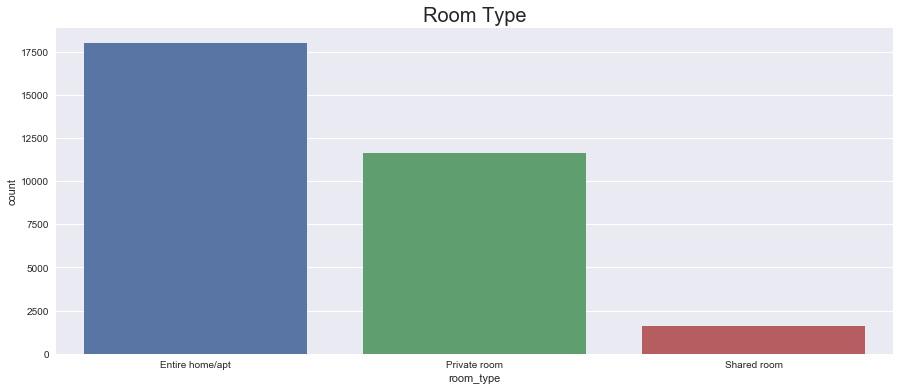

In [12]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['room_type']).set_title('Room Type', fontsize=20)

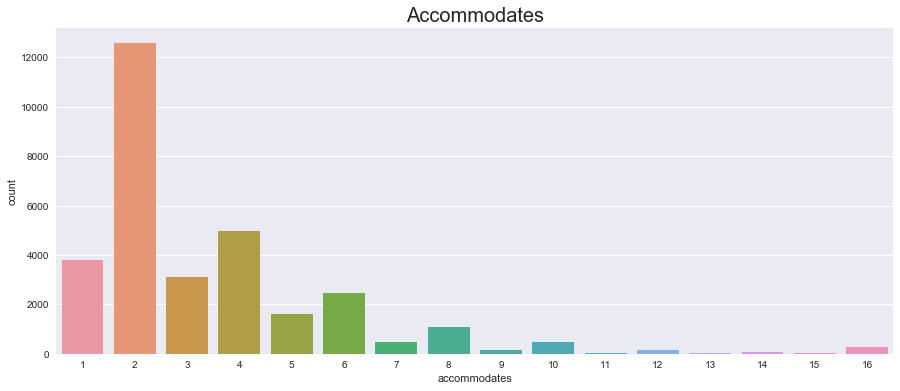

In [13]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['accommodates']).set_title('Accommodates', fontsize=20)

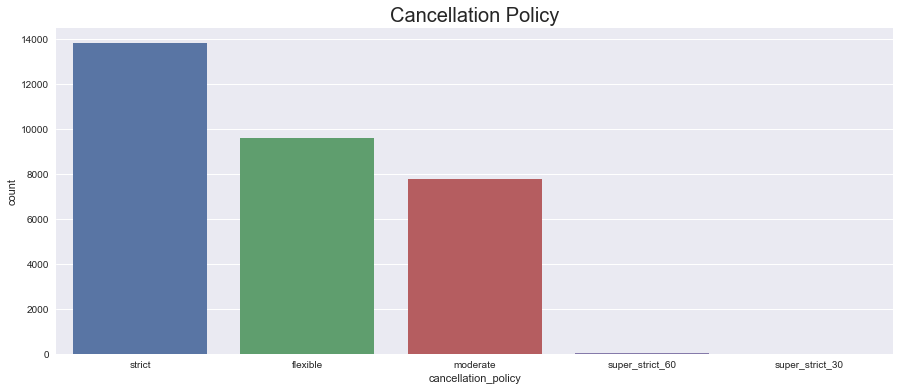

In [14]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['cancellation_policy']).set_title('Cancellation Policy', fontsize=20)

In [15]:
# Investigate Property Type
listing['property_type'].value_counts()

Apartment             13801
House                 12736
Condominium             917
Townhouse               769
Loft                    563
Guesthouse              560
Bungalow                455
Bed & Breakfast         328
Other                   318
Villa                   234
Dorm                    128
Camper/RV               109
Cabin                    77
Hostel                   66
Boat                     44
Guest suite              25
Boutique hotel           23
Tent                     18
Serviced apartment       14
Yurt                     10
Castle                   10
Treehouse                 9
Vacation home             9
Hut                       8
Tipi                      4
Chalet                    4
Earth House               4
In-law                    3
Plane                     1
Train                     1
Island                    1
Parking Space             1
Cave                      1
Casa particular           1
Lighthouse                1
Name: property_type,

In [16]:
# Create an "Other" Category
cat_rename = ['Boat','Guest suite','Boutique hotel','Tent','Serviced apartment','Castle','Yurt',
              'Vacation home','Treehouse','Hut','Tipi','Earth House','Chalet','In-law',
              'Train','Plane','Island','Cave','Parking Space','Casa particular',
              'Lighthouse','Hostel','Cabin','Camper/RV','Dorm','Villa','Other']
listing['property_type'].loc[listing['property_type'].isin(cat_rename)] = 'Other'

C:\Users\peril\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Distributions

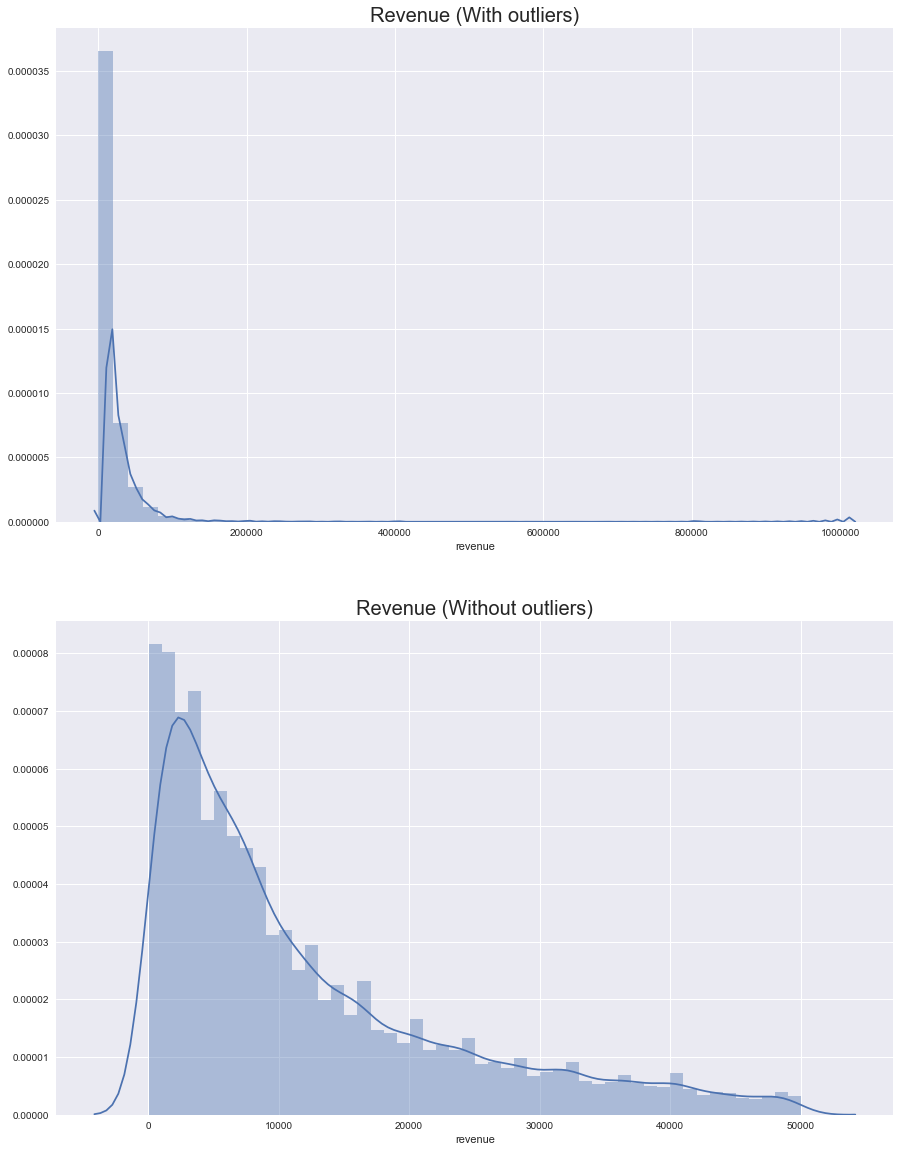

In [17]:
# Without outliers
pricing = listing.query('revenue<50000')

# Review distribution
f, axes = plt.subplots(nrows=2, figsize=(15, 20))
sns.distplot(listing['revenue'],ax=axes[0]).set_title('Revenue (With outliers)', fontsize=20)
sns.distplot(pricing['revenue'], ax=axes[1]).set_title('Revenue (Without outliers)', fontsize=20)

### Spatial Analysis

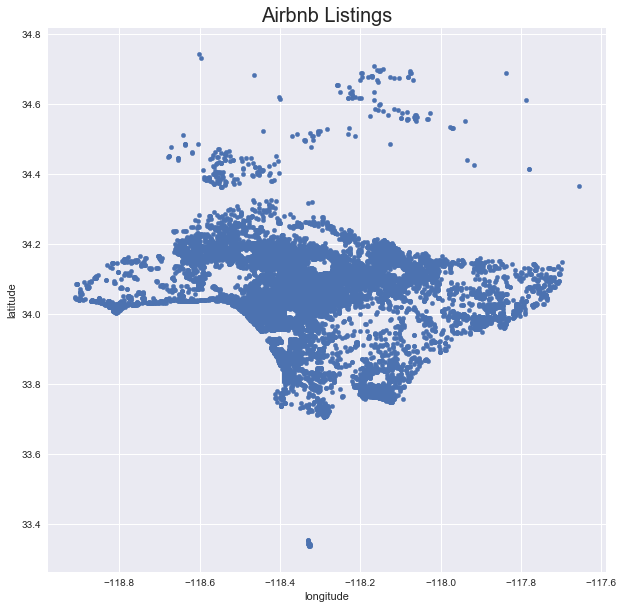

In [18]:
# Plot based on lat and long
listing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,10))
plt.title('Airbnb Listings', fontsize=20)

In [19]:
# There are a lot of outliers north of Los Angeles that I won't consider as part of the area
listing = listing.query('latitude<34.35')

# There are a few outliers down towards San Diego
listing = listing.query('latitude>33.6')

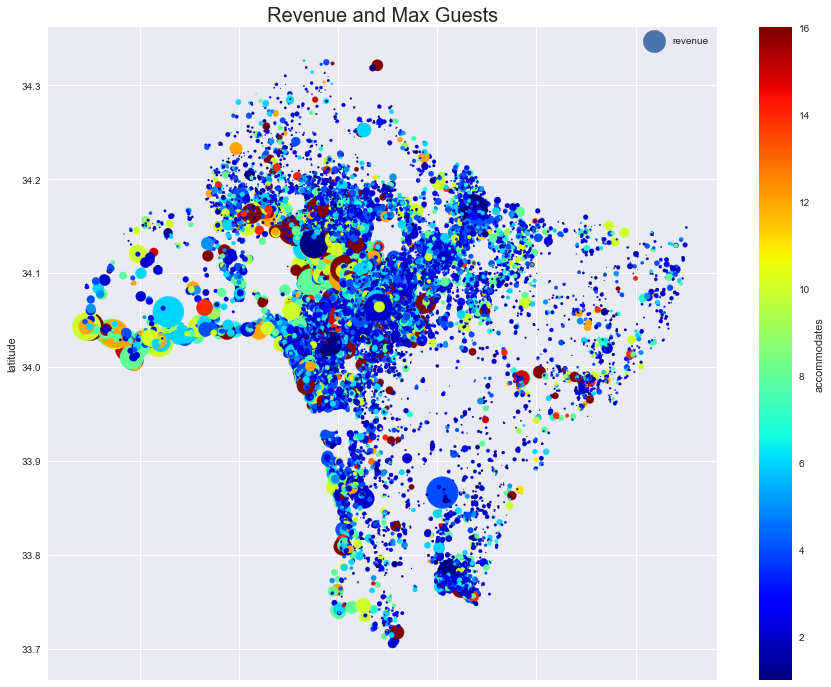

In [20]:
# with a slice on median income
listing.plot(kind="scatter", x="longitude", y="latitude", s=listing["revenue"]/1000, 
             label="revenue", figsize=(15,12), c="accommodates", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.title('Revenue and Max Guests', fontsize=20)

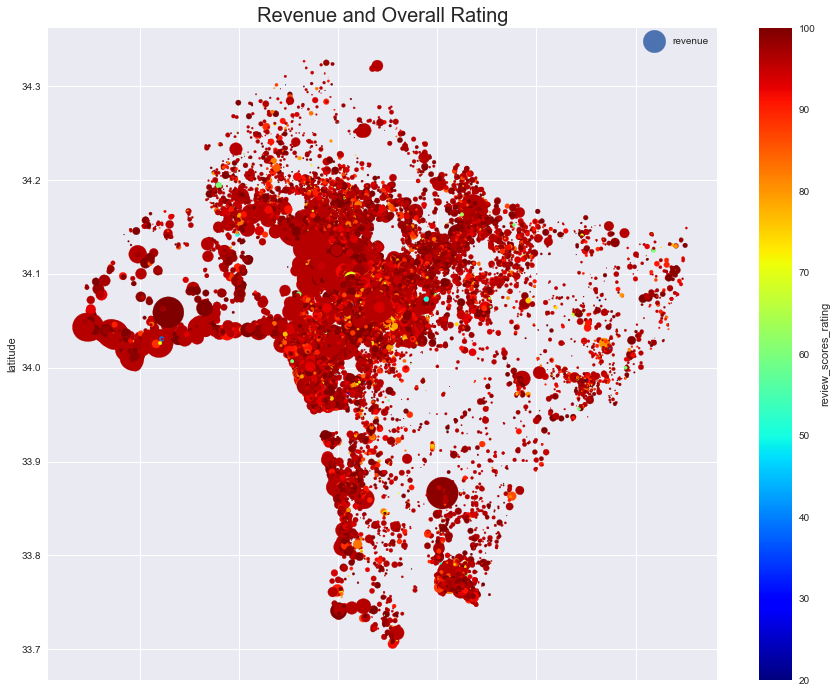

In [21]:
# with a slice on median income
listing.plot(kind="scatter", x="longitude", y="latitude", s=listing["revenue"]/1000, 
             label="revenue", figsize=(15,12), c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.title('Revenue and Overall Rating', fontsize=20)

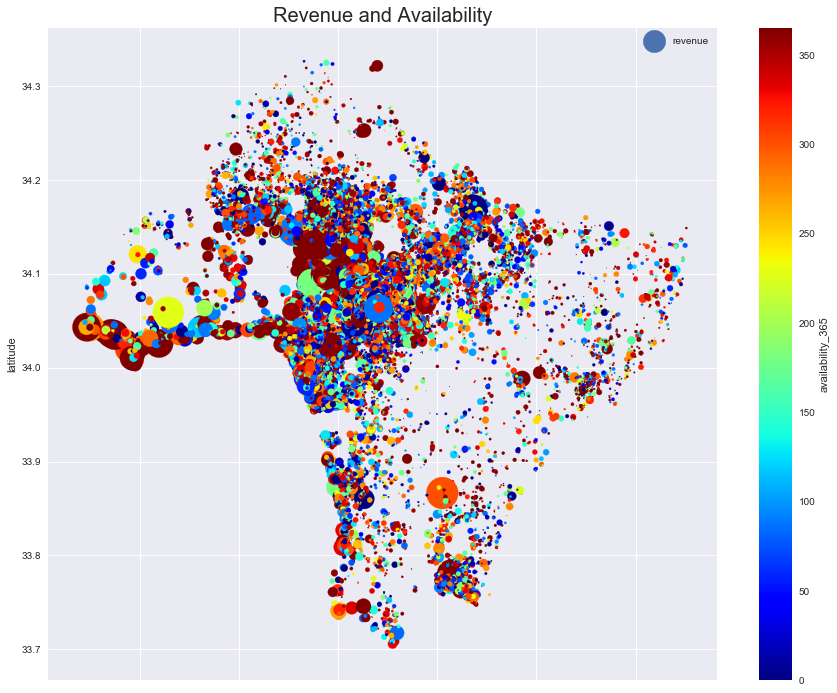

In [22]:
# with a slice on median income
listing.plot(kind="scatter", x="longitude", y="latitude", s=listing["revenue"]/1000, 
             label="revenue", figsize=(15,12), c="availability_365", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.title('Revenue and Availability', fontsize=20)

## Final Cleaning

In [23]:
# Drop lat and long since we don't need it anymore
listing= listing.drop(['latitude','longitude'],axis=1)


# Derive new features from the text field 'amenities'
ame = listing.amenities.astype('object')
ame_list = ('Internet','Wireless','Kitchen','Free parking','Air conditioning','TV','Pets','Heating')

for am in (ame_list):
    listing[am] = ame.str.contains(am)

    
# Turn categorical into column features
features = ['host_response_time','property_type','room_type','bed_type','cancellation_policy']
listing = pd.get_dummies(listing,columns=features,drop_first=True)


# Final column drop
final = listing.drop(['amenities','calendar_updated','price','reviews_per_month','availability_365','cleaning_fee',
                      'extra_people','index','experiences_offered'], axis=1)

# Remove last NaN
final = final[np.isfinite(final['host_identity_verified'])]

### Scale and Standardize

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final)
final2 = scaler.transform(final)
final2 = pd.DataFrame(final,columns=final.columns)

In [25]:
final2.shape

(30998, 53)

In [26]:
# Now to save the cleaned data
final2.to_csv('cleaned_airbnb.csv')